## Programming Exercise 5: Regularized Linear Regression and Bias vs. Variance

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
#import scipy.misc #Used to show matrix as an image
#import matplotlib.cm as cm #Used to display images in a specific colormap
#import random #To pick random images to display
#import scipy.optimize #fmin_cg to train neural network
#import itertools
#from scipy.special import expit #Vectorized sigmoid function

### 1 Regularized Linear Regression

#### 1.1 Visualizing the dataset

In [31]:
datafile = 'data/ex5data1.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
#Cross validation set
Xval, yval = mat['Xval'], mat['yval']
#Test set
Xtest, ytest = mat['Xtest'], mat['ytest']
#Insert a column of 1's to all of the X's, as usual
X =     np.insert(X    ,0,1,axis=1)
Xval =  np.insert(Xval ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
#print "'y' shape: %s. Unique elements in y: %s"%(mat['y'].shape,np.unique(mat['y']))
#print "'X' shape: %s. X[0] shape: %s"%(X.shape,X[0].shape)
#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)
#y is a classification for each image. 1-10, where "10" is the handwritten "0"

In [36]:
#print "X.shape = ",X.shape
#print "y.shape = ",y.shape
#print "Xval.shape = ",Xval.shape
#print "Xtest.shape = ",Xtest.shape

[-15.93675813 -29.15297922  36.18954863  37.49218733 -48.05882945
  -8.94145794  15.30779289 -34.70626581   1.38915437 -44.38375985
   7.01350208  22.76274892]


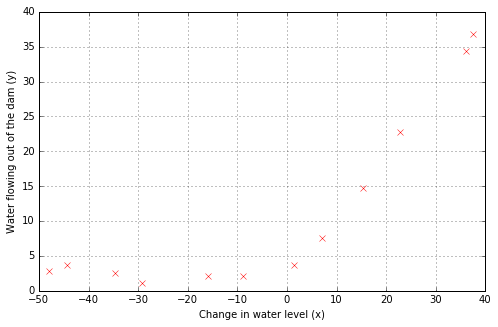

In [37]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1],y,'rx')
    plt.grid(True)
    
plotData()

#### 1.2 Regularized linear regression cost function

In [52]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y,mylambda=0.): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    m = X.shape[0]
    mycost = float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))
    gradterm = (float(mylambda)/(2*m)) * float(mytheta[1:].T.dot(mytheta[1:]))
    return mycost + gradterm

In [53]:
#"Using theta initialized at [1; 1], you should expect to see an output of 303.993."
mytheta = np.array([[1.],[1.]])
print computeCost(mytheta,X,y,mylambda=0.)

303.951525554


#### 1.3 Regularized linear regression gradient

In [55]:
#### 1.4 Fitting linear regression

In [56]:
### 2 Bias-variance

In [57]:
#### 2.1 Learning curves

In [58]:
### 3 Polynomial regression

In [59]:
#### 3.1 Learning Polynomial Regression

In [60]:
#### 3.2 Optional: Adjusting the regularization parameter

In [ ]:
#### 3.3 Selecting \